# FOTS with Unified Network

### Application

* To detect text in image on demand.  
            eg:google lens.
* Search for the text/texts(space separated) and point to its location. 
            eg: if i want to search for a book in shelf,i would give a text from the books title to the app and app would search and point the book as a bounding box around that text.

### Metric

* Apart from F1Score,Metric would be on exprimental basis,since it has to identify text.
* For Second case,Metric would be text/texts identified in time taken.(to measure how quick it is in real time.)

##### Suceess Metric
* When the texts are identified properly.

##### Failure
* When texts are not detected or miss a few aplhabets among the words.

### Latency and Other Properties.

* The Application should be on realtime basis,hence the latency should be as low as possible.
* During selecting the text manually to identify,it should be in text form so it can be copied.
* During Searching for the text in photo,in should point the text as an bounding box or a bright dot.

### Base Process:

* The Application will be analyising and recognising all the text in the image,but wont display the data untill it is requested by the user in the form of touch/mouse point.
* The Text and bounding box of the region, which the user wants to select will be displayed.
* In Search Case: Once after recognizing process is over,only the bounding box will be present in the region where the text is located.

### Approach:

* Implement the process as mentioned in the research paper. But use Resnet-34(instead of Resnet 50) to attain realtime latency.
* At the end,instead of displaying bounding boxes along with text,our use cases will be implemented as mentioned in above cells.  
* Base Process.    
        Paper implementiation(FOTS Network)   
        IF (region is tapped):  
                Show text in that region and respective bounding box.  
        ELIF(search text is provided):  
                Find the Text and point the text using a bounding box.  
                
               
         

## EDA of Datasets:

* The model will be trained on SynthText for 10 epochs and then fined tuned on ICDAR Dataset.

### ICDAR Dataset 2015:

In [1]:
from IPython.display import Image


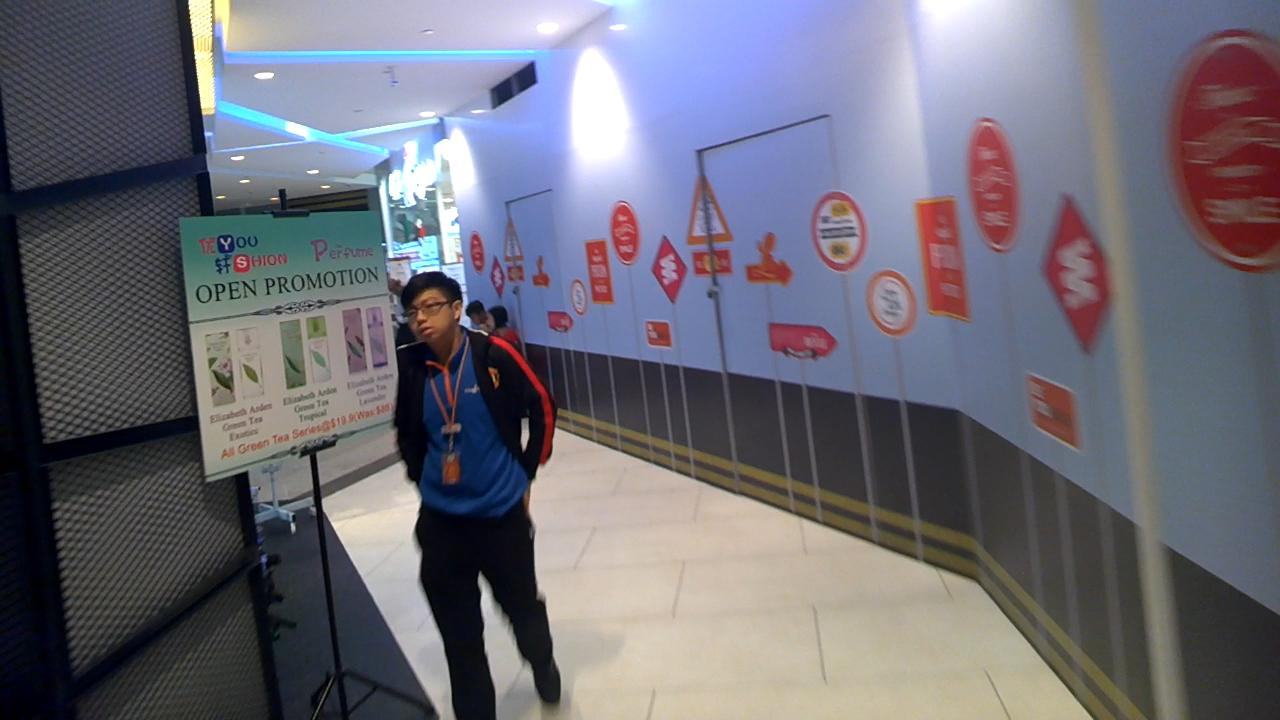

In [2]:
Image('/home/geekostate/FOTS/icdar_2015/images/img_475.jpg')


#### Ground truth of above image

In [3]:
!cat /home/geekostate/FOTS/icdar_2015/ground_truth/gt_img_475.txt



### Observation:

* Consists of Train -1000 images Test - 500 images
* Ground truth has bounding box information of only Words.

#### Ground Truth:Text Localisation:

* x1,y1,x2,y2,x3,y3,x4,y4,transcription
* Co-ordinates of bounding boxs from top left- clockwise
* '####' is "Do not Care"


### SynthText

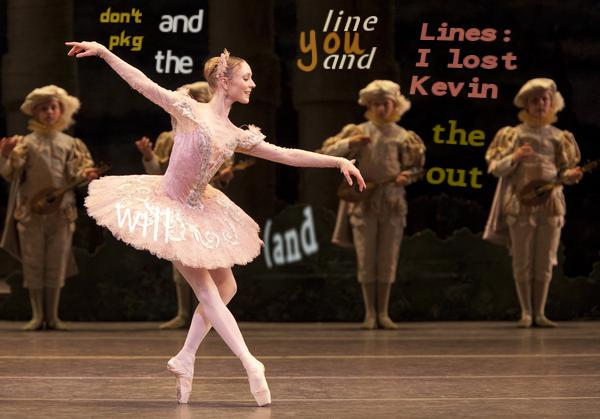

In [4]:
Image('/home/geekostate/FOTS/SynthText/8/ballet_106_0.jpg')


#### Ground truth of above image

In [1]:
import scipy.io
mat = scipy.io.loadmat('gt.mat')

In [2]:
for i in mat['imnames']:
    if()

array([[array(['8/ballet_106_0.jpg'], dtype='<U18'),
        array(['8/ballet_106_1.jpg'], dtype='<U18'),
        array(['8/ballet_106_10.jpg'], dtype='<U19'), ...,
        array(['164/steel_75_97.jpg'], dtype='<U19'),
        array(['164/steel_75_98.jpg'], dtype='<U19'),
        array(['164/steel_75_99.jpg'], dtype='<U19')]], dtype=object)

### Observation:

* Dataset has 858,750 synthetic scene-image files (.jpg) split into 200 directories, with 7,266,866 word-instances, and 28,971,487 characters.
* Ground truth contains the bounding box data for words,characters.

##### Ground Truth Explained.

imnames: [ [ [name]]]  
txt:[ [[txt in name_i]]]  
Word:[ [[[x1][x2][x3][x4]] [[y1][y2][y3][y4]]] ] here we have 2,4,Nwords_in_i.  
         - the first dimension is 2 for x and y respectively.  
         - the second dimension corresponds to the 4 points (clockwise, starting from top-left.  
         -  the third dimension of size NWORDS_i, corresponds to the number of words in the i_th image.




###### Websites:
* SynthText:
    * https://www.robots.ox.ac.uk/~vgg/data/scenetext/
    * http://www.robots.ox.ac.uk/~vgg/data/scenetext/readme.txt

* ICDAR
    * https://rrc.cvc.uab.es/?ch=4&com=downloads
    * https://rrc.cvc.uab.es/?ch=4&com=tasks
    